### MIDDLEWARE

In [1]:
import numpy as np

In [6]:
path = "/home/andrea/Desktop/Baseline4/Set/"

timesFiles = []
throughputFiles = []

throughputW8 = []
throughputW16 = []
throughputW32 = []
throughputW64 = []

timesW8 = []
timesW16 = []
timesW32 = []
timesW64= []

for rep in range(1, 4):
    for clients in [1, 4, 8, 12, 16, 20, 24, 28, 32, 40]:
        throughputW8.append((path+'rep'+str(rep)+'/MW4/'+'Set_C'+str(clients)+'_T1'+'_W8_R'+str(rep)+'/Throughput.log'))
        throughputW8.append((path+'rep'+str(rep)+'/MW5/'+'Set_C'+str(clients)+'_T1'+'_W8_R'+str(rep)+'/Throughput.log'))

        timesW8.append((path+'rep'+str(rep)+'/MW4/'+'Set_C'+str(clients)+'_T1'+'_W8_R'+str(rep)+'/times.log'))
        timesW8.append((path+'rep'+str(rep)+'/MW5/'+'Set_C'+str(clients)+'_T1'+'_W8_R'+str(rep)+'/times.log'))

        throughputW16.append((path+'rep'+str(rep)+'/MW4/'+'Set_C'+str(clients)+'_T1'+'_W16_R'+str(rep)+'/Throughput.log'))
        throughputW16.append((path+'rep'+str(rep)+'/MW5/'+'Set_C'+str(clients)+'_T1'+'_W16_R'+str(rep)+'/Throughput.log'))

        timesW16.append((path+'rep'+str(rep)+'/MW4/'+'Set_C'+str(clients)+'_T1'+'_W16_R'+str(rep)+'/times.log'))
        timesW16.append((path+'rep'+str(rep)+'/MW5/'+'Set_C'+str(clients)+'_T1'+'_W16_R'+str(rep)+'/times.log'))

        throughputW32.append((path+'rep'+str(rep)+'/MW4/'+'Set_C'+str(clients)+'_T1'+'_W32_R'+str(rep)+'/Throughput.log'))
        throughputW32.append((path+'rep'+str(rep)+'/MW5/'+'Set_C'+str(clients)+'_T1'+'_W32_R'+str(rep)+'/Throughput.log'))

        timesW32.append((path+'rep'+str(rep)+'/MW4/'+'Set_C'+str(clients)+'_T1'+'_W32_R'+str(rep)+'/times.log'))
        timesW32.append((path+'rep'+str(rep)+'/MW5/'+'Set_C'+str(clients)+'_T1'+'_W32_R'+str(rep)+'/times.log'))

        throughputW64.append((path+'rep'+str(rep)+'/MW4/'+'Set_C'+str(clients)+'_T1'+'_W64_R'+str(rep)+'/Throughput.log'))
        throughputW64.append((path+'rep'+str(rep)+'/MW5/'+'Set_C'+str(clients)+'_T1'+'_W64_R'+str(rep)+'/Throughput.log'))

        timesW64.append((path+'rep'+str(rep)+'/MW4/'+'Set_C'+str(clients)+'_T1'+'_W64_R'+str(rep)+'/times.log'))
        timesW64.append((path+'rep'+str(rep)+'/MW5/'+'Set_C'+str(clients)+'_T1'+'_W64_R'+str(rep)+'/times.log'))
        
timesFiles.append(timesW8)
timesFiles.append(timesW16)
timesFiles.append(timesW32)
timesFiles.append(timesW64)

throughputFiles.append(throughputW8)
throughputFiles.append(throughputW16)
throughputFiles.append(throughputW32)
throughputFiles.append(throughputW64)

In [7]:
results = [[[0 for x in range(8)] for y in range(len(throughputW8)//6)] for z in range(0, 4)]
f = 0
for worker in range(1, 5):
    f = 0
    for clients in [1, 4, 8, 12, 16, 20, 24, 28, 32, 40]:
        throughput = np.zeros(3)
        response = np.zeros(3)
        for rep in range(1, 4):
            i = 2
            count = 0
            
            arrayFileDaAprire = [z for z in throughputFiles[worker-1] if z == path+'rep'+str(rep)+'/MW4/'+'Set_C'+str(clients)+'_T1'+'_W'+str(2**(worker+2))+'_R'+str(rep)+'/Throughput.log']
            if len(arrayFileDaAprire) != 0:
                fileThroughput = open(arrayFileDaAprire[0], "r")
                linesThroughput = []
                for line in fileThroughput:
                    linesThroughput.append(float(line[:-1]))

                x = np.asarray(linesThroughput)
                throughput[rep-1] = np.mean(x[1:])

                countThroughput1 = len(x[1:])

            fileThroughput2 = open([z for z in throughputFiles[worker-1] if z == path+'rep'+str(rep)+'/MW5/'+'Set_C'+str(clients)+'_T1'+'_W'+str(2**(worker+2))+'_R'+str(rep)+'/Throughput.log'][0], "r")
            linesThroughput2 = []
            for line in fileThroughput2:
                linesThroughput2.append(float(line[:-1]))

            x2 = np.asarray(linesThroughput2)
            throughput[rep-1] += np.mean(x2[1:])            
             
            countResponse1 = 0
            arrayFileDaAprire = [z for z in timesFiles[worker-1] if z == path+'rep'+str(rep)+'/MW4/'+'Set_C'+str(clients)+'_T1'+'_W'+str(2**(worker+2))+'_R'+str(rep)+'/times.log']
            if len(arrayFileDaAprire) != 0:
                fileResponse = open(arrayFileDaAprire[0], "r")
                linesResponse = []
                for line in fileResponse.readlines()[1:]:
                    linesResponse.append(line)

                for line in linesResponse:
                    if line.split("\t")[-1][:-1] != 'null':
                        response[rep-1] += float(line.split("\t")[-1][:-1])

                countResponse1 = len(linesResponse)
                
            fileResponse2 = open([z for z in timesFiles[worker-1] if z == path+'rep'+str(rep)+'/MW5/'+'Set_C'+str(clients)+'_T1'+'_W'+str(2**(worker+2))+'_R'+str(rep)+'/times.log'][0], "r")
            linesResponse2 = []
            for line in fileResponse2.readlines()[1:]:
                linesResponse2.append(line)

            for line in linesResponse2:
                if line.split("\t")[-1][:-1] != 'null':
                    response[rep-1] += float(line.split("\t")[-1][:-1])
                
            countResponse2 = len(linesResponse2)
                
            response[rep-1] = response[rep-1] / ((countResponse1+countResponse2) * 1000000)
            
        results[worker-1][f][0] = clients
        results[worker-1][f][1] = 1
        results[worker-1][f][2] = throughput[0]
        results[worker-1][f][3] = throughput[1]
        results[worker-1][f][4] = throughput[2]
        results[worker-1][f][5] = response[0]
        results[worker-1][f][6] = response[1]
        results[worker-1][f][7] = response[2]
        f += 1

In [8]:
fileOutput = open("/home/andrea/Desktop/Baseline4/Set/resultsMW.txt", "w")

In [9]:
for j in range(len(results)):
    fileOutput.write("Worker: " + str(2**(3+j)) + "\n")
    for h in range(0, len(results[0])):         
        fileOutput.write("\nClients: ")
        fileOutput.write(str(int(results[j][h][0])))
        fileOutput.write("\tThreads: ")
        fileOutput.write(str(int(results[j][h][1])))
        fileOutput.write('\nThroughput: ')
        fileOutput.write(str(results[j][h][2])+ " " + str(results[j][h][3]) + " " + str(results[j][h][4]))
        fileOutput.write('\nLatency: ')
        fileOutput.write(str(results[j][h][5]) +" " + str(results[j][h][6]) + " " + str(results[j][h][7]))
        fileOutput.write('\n')

    fileOutput.write('\n\n')

fileOutput.close()

### MEMTIER

In [68]:
filesW8 = []
filesW16 = []
filesW32 = []
filesW64 = []
files = []

path = "/home/andrea/Desktop/Baseline4/Set"
path1 = "/home/andrea/Desktop/Baseline4/Set1/"
path2 = "/home/andrea/Desktop/Baseline4/Set2/"
path3 = "/home/andrea/Desktop/Baseline4/Set3/"
path4 = "/home/andrea/Desktop/Baseline4/Set4/"
path5 = "/home/andrea/Desktop/Baseline4/Set5/"
path6 = "/home/andrea/Desktop/Baseline4/Set6/"


for rep in range(1, 4):
    for clients in [1, 4, 8, 12, 16, 20, 24, 28, 32, 40]:
        filesW8.append((path1+'rep'+str(rep)+'/Set_C'+str(clients)+'_T1'+'_W8_R'+str(rep)+'.log'))
        filesW8.append((path2+'rep'+str(rep)+'/Set_C'+str(clients)+'_T1'+'_W8_R'+str(rep)+'.log'))
        filesW8.append((path3+'rep'+str(rep)+'/Set_C'+str(clients)+'_T1'+'_W8_R'+str(rep)+'.log'))
        filesW8.append((path4+'rep'+str(rep)+'/Set_C'+str(clients)+'_T1'+'_W8_R'+str(rep)+'.log'))
        filesW8.append((path5+'rep'+str(rep)+'/Set_C'+str(clients)+'_T1'+'_W8_R'+str(rep)+'.log'))
        filesW8.append((path6+'rep'+str(rep)+'/Set_C'+str(clients)+'_T1'+'_W8_R'+str(rep)+'.log'))

        
        filesW16.append((path1+'rep'+str(rep)+'/Set_C'+str(clients)+'_T1'+'_W16_R'+str(rep)+'.log'))
        filesW16.append((path2+'rep'+str(rep)+'/Set_C'+str(clients)+'_T1'+'_W16_R'+str(rep)+'.log'))
        filesW16.append((path3+'rep'+str(rep)+'/Set_C'+str(clients)+'_T1'+'_W16_R'+str(rep)+'.log'))
        filesW16.append((path4+'rep'+str(rep)+'/Set_C'+str(clients)+'_T1'+'_W16_R'+str(rep)+'.log'))
        filesW16.append((path5+'rep'+str(rep)+'/Set_C'+str(clients)+'_T1'+'_W16_R'+str(rep)+'.log'))
        filesW16.append((path6+'rep'+str(rep)+'/Set_C'+str(clients)+'_T1'+'_W16_R'+str(rep)+'.log'))

        
        filesW32.append((path1+'rep'+str(rep)+'/Set_C'+str(clients)+'_T1'+'_W32_R'+str(rep)+'.log'))
        filesW32.append((path2+'rep'+str(rep)+'/Set_C'+str(clients)+'_T1'+'_W32_R'+str(rep)+'.log'))
        filesW32.append((path3+'rep'+str(rep)+'/Set_C'+str(clients)+'_T1'+'_W32_R'+str(rep)+'.log'))
        filesW32.append((path4+'rep'+str(rep)+'/Set_C'+str(clients)+'_T1'+'_W32_R'+str(rep)+'.log'))
        filesW32.append((path5+'rep'+str(rep)+'/Set_C'+str(clients)+'_T1'+'_W32_R'+str(rep)+'.log'))
        filesW32.append((path6+'rep'+str(rep)+'/Set_C'+str(clients)+'_T1'+'_W32_R'+str(rep)+'.log'))

        
        filesW64.append((path1+'rep'+str(rep)+'/Set_C'+str(clients)+'_T1'+'_W64_R'+str(rep)+'.log'))
        filesW64.append((path2+'rep'+str(rep)+'/Set_C'+str(clients)+'_T1'+'_W64_R'+str(rep)+'.log'))
        filesW64.append((path3+'rep'+str(rep)+'/Set_C'+str(clients)+'_T1'+'_W64_R'+str(rep)+'.log'))
        filesW64.append((path4+'rep'+str(rep)+'/Set_C'+str(clients)+'_T1'+'_W64_R'+str(rep)+'.log'))
        filesW64.append((path5+'rep'+str(rep)+'/Set_C'+str(clients)+'_T1'+'_W64_R'+str(rep)+'.log'))
        filesW64.append((path6+'rep'+str(rep)+'/Set_C'+str(clients)+'_T1'+'_W64_R'+str(rep)+'.log'))
        
files.append(filesW8)
files.append(filesW16)
files.append(filesW32)
files.append(filesW64)

In [79]:
results = [[[0 for x in range(8)] for y in range(len(filesW8)//18)] for z in range(0, 4)] 
for worker in range(1, 5):
    f = 0
    for clients in [1, 4, 8, 12, 16, 20, 24, 28, 32, 40]:
        throughput = np.zeros(3)
        latency = np.zeros(3)
        for rep in range(1, 4):
            arrayFileDaAprire = []
            
            for h in range(1, 7):
                arrayFileDaAprire.append([z for z in files[worker-1] if z == path+ str(h) +'/rep'+str(rep)+'/Set_C'+str(clients)+'_T1_W'+str(2**(worker+2))+'_R'+str(rep)+'.log'])
           
            for j in range(0, len(arrayFileDaAprire)):
                fileI = open(arrayFileDaAprire[j][0], "r")
                linesI = []
                for line in fileI:
                    linesI.append(line)

                xI = np.asarray(linesI)
                countI = 0
                i = 2
                while xI[i] != "\n":
                    countI += 1
                    i += 1

                throughput[rep-1] += float(xI[i-1].split(",")[1].split(" ")[-2])
                
                z = xI[i-1].split(",")[-1].split(" ")
                for k in range(0, len(z)):
                    if(z[k] == "msec"):
                        latency[rep-1] += float(z[k-1][:-1])

            throughput[rep-1] = throughput[rep-1] / (countI-1)
            latency[rep-1] = latency[rep-1] / 6
        

        results[worker-1][f][0] = clients
        results[worker-1][f][1] = 1
        results[worker-1][f][2] = throughput[0]
        results[worker-1][f][3] = throughput[1]
        results[worker-1][f][4] = throughput[2]
        results[worker-1][f][5] = latency[0]
        results[worker-1][f][6] = latency[1]
        results[worker-1][f][7] = latency[2]
        f += 1

In [82]:
fileOutput = open("/home/andrea/Desktop/Baseline4/resultsMemtier.txt", "w")

In [83]:
for j in range(len(results)):
    fileOutput.write("Worker: " + str(2**(3+j)) + "\n")
    for h in range(0, len(results[0])):         
        fileOutput.write("\nClients: ")
        fileOutput.write(str(int(results[j][h][0])))
        fileOutput.write("\tThreads: ")
        fileOutput.write(str(int(results[j][h][1])))
        fileOutput.write('\nThroughput: ')
        fileOutput.write(str(results[j][h][2])+ " " + str(results[j][h][3]) + " " + str(results[j][h][4]))
        fileOutput.write('\nLatency: ')
        fileOutput.write(str(results[j][h][5]) +" " + str(results[j][h][6]) + " " + str(results[j][h][7]))
        fileOutput.write('\n')

    fileOutput.write('\n\n')

fileOutput.close()

### PLOTTING

In [2]:
numOfRepetitions = 3
numOfClients = np.zeros(10) 


throughputFinal = [[0 for x in range(10)] for y in range(4)]
errThroughputFinal = [[0 for x in range(10)] for y in range(4)]
latencyFinal = [[0 for x in range(10)] for y in range(4)]
errLatencyFinal = [[0 for x in range(10)] for y in range(4)]

file = open("/home/andrea/Desktop/Final/Baseline4/resultsMW.txt")
#files.append(open("/home/andrea/Desktop/Baseline2prime/2.2/Set11211/results.txt"))
worker = 0
lines = []
for line in file:
    lines.append(line)
x = np.asarray(lines)
j = 0
while j < len(x):
    i = 2
    index = 0
    
    throughput = np.zeros((10, numOfRepetitions)) 
    errThroughput = np.zeros(10) 
    latency = np.zeros((10, numOfRepetitions))
    errLatency = np.zeros(10)
        
    while i < ((len(x) / 4)-1):
        clients = int(x[j+i].split("\t")[0].split(" ")[1]) * int(x[j+i].split("\t")[1].split(" ")[1])
        numOfClients[index] = clients
        
        throughput[index][0] = float(x[j+i+1].split()[1])
        throughput[index][1] = float(x[j+i+1].split()[2])
        throughput[index][2] = float(x[j+i+1].split()[3])

        latency[index][0] = float(x[j+i+2].split()[1])
        latency[index][1] = float(x[j+i+2].split()[2])
        latency[index][2] = float(x[j+i+2].split()[3])

        i += 4
        index += 1
    
    numOfClients = numOfClients.astype(dtype=int)

    errThroughput = np.std(throughput, axis = 1)
    errLatency = np.std(latency, axis = 1)

    throughput = np.mean(throughput, axis = 1)
    latency = np.mean(latency, axis = 1)
    print(throughput)
    throughputFinal[worker] = throughput
    latencyFinal[worker] = latency
    errThroughputFinal[worker] = errThroughput
    errLatencyFinal[worker] = errLatency
    
    j += i+1
    worker += 1

numOfClients = numOfClients * 6

[ 1130.13194445  3686.60042735  4998.22413003  5784.18910256  5479.38400488
  5854.85615079  5746.05181624  5435.82539682  5769.63194444  5527.07799145]
[ 1151.74450549  3909.88194445  5545.43589744  6308.65705128  6583.60202992
  6796.35897436  6830.50694444  6623.50396825  6453.38293651  6517.60659479]
[ 1295.34615385  3874.24305556  5805.85416667  7031.06944445  7129.44925214
  7902.82745726  8001.05982906  8047.18002137  8226.49679487  8239.9375    ]
[ 1270.50534188  3782.20833333  5265.59647436  6540.58333333  7639.64583333
  7955.1875      8584.97916667  9027.05181624  9394.69871795  9515.58760684]


In [3]:
import matplotlib.pyplot as plt

In [21]:
plt.figure(figsize=(27, 20))
plt.errorbar(numOfClients, throughputFinal[0], yerr=errThroughputFinal[0], fmt='-o',  linewidth=3.0, markersize = 10, label="8 worker threads", color="b", capsize=7)
plt.errorbar(numOfClients, throughputFinal[1], yerr=errThroughputFinal[1], fmt='-o',  linewidth=3.0, markersize = 10, label="16 worker threads", color="r", capsize=7)
plt.errorbar(numOfClients, throughputFinal[2], yerr=errThroughputFinal[2], fmt='-o',  linewidth=3.0, markersize = 10, label="32 worker threads", color="g", capsize=7)
plt.errorbar(numOfClients, throughputFinal[3], yerr=errThroughputFinal[3], fmt='-o',  linewidth=3.0, markersize = 10, label="64 worker threads", color="C1", capsize=7)

plt.legend(loc=2, fontsize=30)
plt.title('Average Throughput over number of clients', fontsize= 40)
plt.xlabel("Number of Clients", fontsize= 30)
plt.ylabel("Avg. Throughput [ops/sec]", fontsize= 30)
plt.rc('grid', linestyle="-.", color ='grey')
plt.grid(True)
plt.xticks(numOfClients)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xlim(xmin=0)
plt.ylim(ymin=0)

(0, 10152.92096776005)

In [22]:
plt.savefig('/home/andrea/Desktop/Final/Baseline4/ThroughputMW.png')

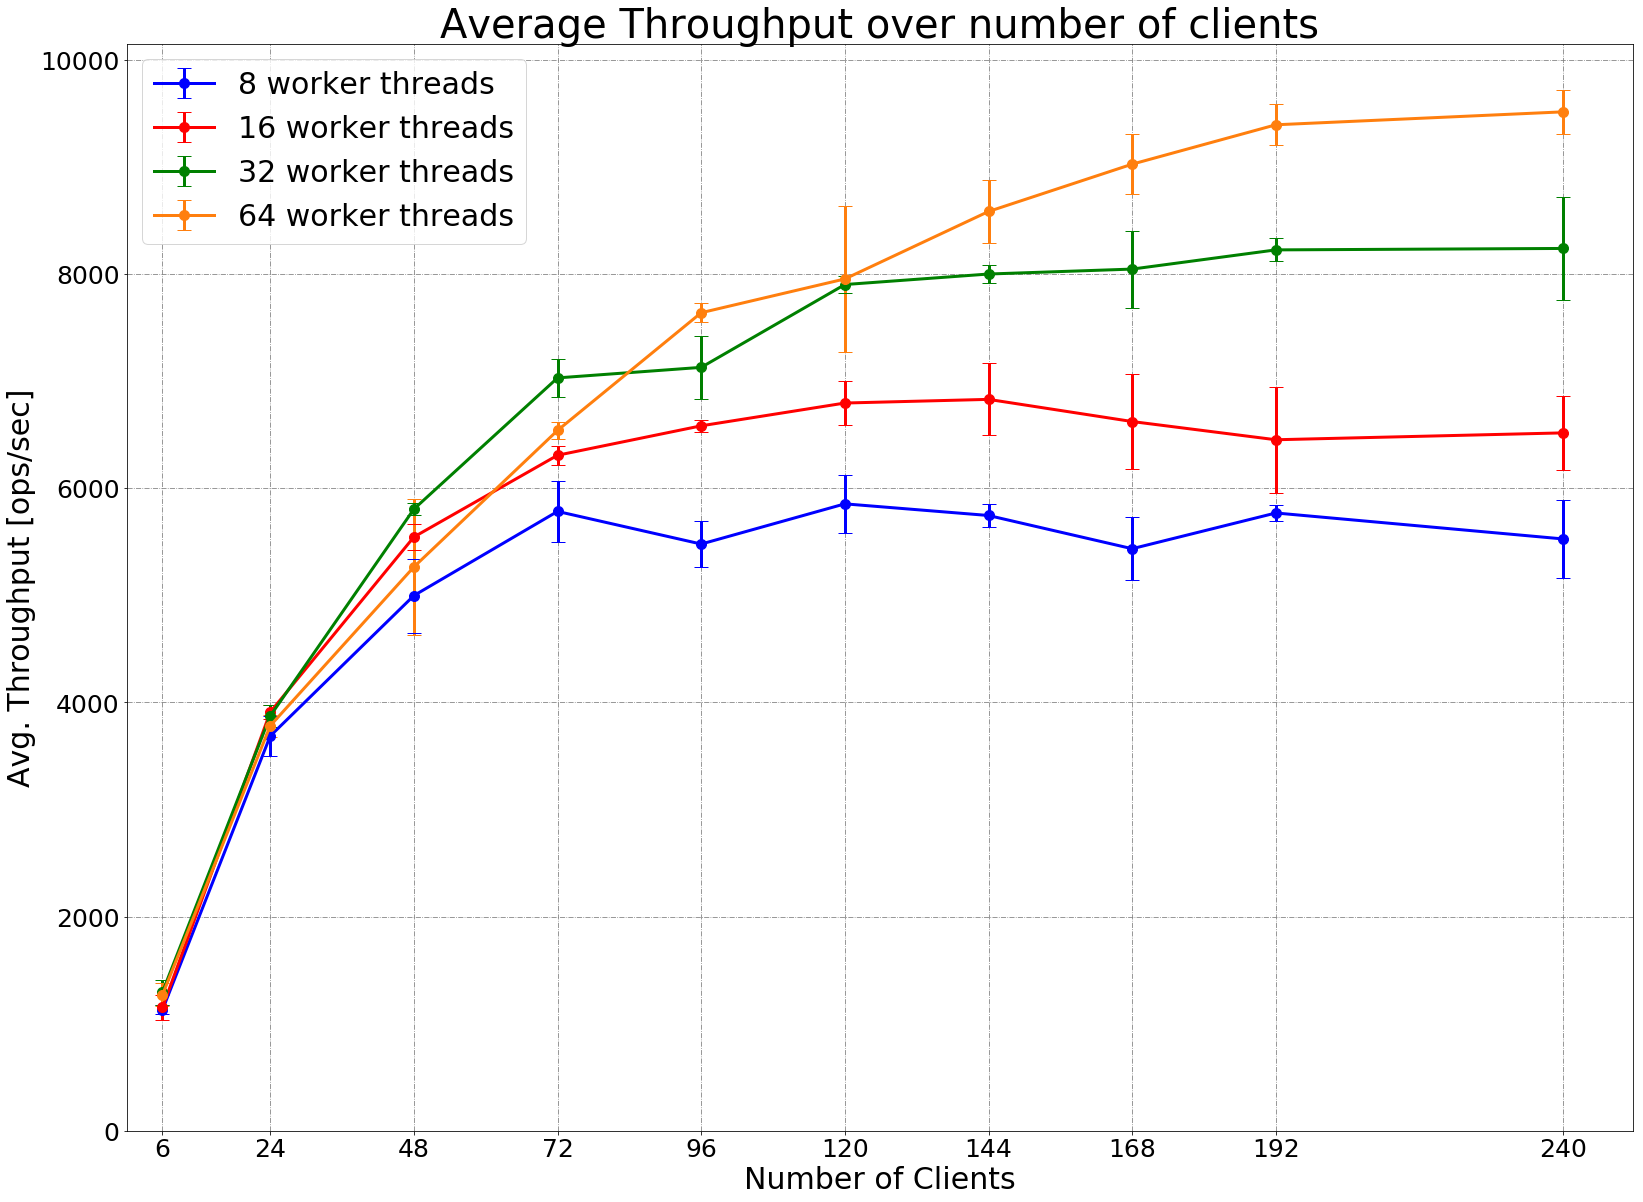

In [20]:
plt.show()